In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import utils

In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16A'
lw_d = 0.8
lw_m = 1.0

Res_A = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_A_ret_16_2columns_n1000/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )
d_spec_A = Res_A._load_object('d_spec', bestfit_prefix=False)

Res_B = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_A_ret_15_1column_n1000/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )
d_spec_B = Res_B._load_object('d_spec', bestfit_prefix=False)

Res_A.compare_evidence(Res_B.ln_Z)

color_m_A = '#396ED8'; color_m_B = '#FF622E'
color_A = '#396ED8'; color_B = '#FF622E'

  analysing data from ../retrieval_outputs/fiducial_J_A_ret_15_1column_n1000/test_.txt
['modes', 'nested sampling global log-evidence', 'nested sampling global log-evidence error', 'global evidence', 'global evidence error', 'nested importance sampling global log-evidence', 'nested importance sampling global log-evidence error', 'marginals']
1399128.9058026907
1399123.4062811895
1399123.4062811895


AttributeError: 'RetrievalResults' object has no attribute 'ln_Z'

In [2]:
name_A = 'Luhman 16B'; name_B = 'Luhman 16B'
lw_d = 0.8
lw_m = 1.0

Res_A = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_B_ret_53_2columns_n1000/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )
d_spec_A = Res_A._load_object('d_spec', bestfit_prefix=False)

Res_B = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_B_ret_51_1column_n1000/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )
d_spec_B = Res_B._load_object('d_spec', bestfit_prefix=False)

Res_A.compare_evidence(Res_B.ln_Z)

color_m_A = '#FF622E'; color_m_B = '#396ED8'
color_A = '#FF622E'; color_B = '#396ED8'

  analysing data from ../retrieval_outputs/fiducial_J_B_ret_53_2columns_n1000/test_.txt
['modes', 'nested sampling global log-evidence', 'nested sampling global log-evidence error', 'global evidence', 'global evidence error', 'nested importance sampling global log-evidence', 'nested importance sampling global log-evidence error', 'marginals']
1395575.5298175712
1395560.6774313925
1395560.6774313925
  analysing data from ../retrieval_outputs/fiducial_J_B_ret_51_1column_n1000/test_.txt
['modes', 'nested sampling global log-evidence', 'nested sampling global log-evidence error', 'global evidence', 'global evidence error', 'nested importance sampling global log-evidence', 'nested importance sampling global log-evidence error', 'marginals']
1395569.7135439706
1395556.204842826
1395556.204842826
Current vs. given: ln(B)=4.47 | sigma=3.45
Given vs. current: ln(B)=-4.47 | sigma=nan


In [3]:
#int_contr_em_A1, _ = Res_A.get_int_contr_em(m_set='J1226_A')
#int_contr_em_A2, _ = Res_A.get_int_contr_em(m_set='J1226_B')
int_contr_em_A1, _ = Res_A.get_int_contr_em(m_set='J1226_B')
int_contr_em_A2, _ = Res_A.get_int_contr_em(m_set='J1226_A')

## Abundance profiles

In [4]:
q = np.array([
    0.5-0.997/2, 0.5-0.95/2, 0.5-0.68/2, 0.5, 
    0.5+0.68/2, 0.5+0.95/2, 0.5+0.997/2
    ])

print(
    '{:.1f} ({:.1f})(+{:.1f})'.format(
        np.median(10**Res_A.posterior[:,7]), 
        *(np.quantile(10**Res_A.posterior[:,7], q=q[[2,4]])-np.median(10**Res_A.posterior[:,7]))
    )
)
print(
    '{:.1f} ({:.1f})(+{:.1f})'.format(
        np.median(10**Res_B.posterior[:,7]), 
        *(np.quantile(10**Res_B.posterior[:,7], q=q[[2,4]])-np.median(10**Res_B.posterior[:,7]))
    )
)

cf_posterior_A = 1-Res_A.posterior[:,6]

12.2 (-11.1)(+119.3)
14.5 (-1.2)(+2.3)


In [5]:
#Chem_A1 = Res_A._load_object('Chem', m_set='J1226_A')
#Chem_A2 = Res_A._load_object('Chem', m_set='J1226_B')
Chem_A1 = Res_A._load_object('Chem', m_set='J1226_B')
Chem_A2 = Res_A._load_object('Chem', m_set='J1226_A')
Chem_B = Res_B._load_object('Chem')

PT_A = Res_A._load_object('PT')
PT_B = Res_B._load_object('PT')

contr_A = np.load(f'{Res_A.prefix}data/bestfit_int_contr_em_{Res_A.m_set}.npy')
contr_B = np.load(f'{Res_B.prefix}data/bestfit_int_contr_em_{Res_B.m_set}.npy')

_, opa_envelope_A1, _, opa_envelope_A1_fine, fine_pressure, _ = Res_A.get_grey_cloud_opacity(
    #keys_indices={'log_opa_base_gray':7, 'log_P_base_gray':8, 'f_sed_gray':9}, 
    keys_indices={'log_opa_base_gray':13, 'log_P_base_gray':14, 'f_sed_gray':15}, N_fine_pressure=100, 
    )
_, opa_envelope_A2, _, opa_envelope_A2_fine, fine_pressure, _ = Res_A.get_grey_cloud_opacity(
    #keys_indices={'log_opa_base_gray':13, 'log_P_base_gray':14, 'f_sed_gray':15}, 
    keys_indices={'log_opa_base_gray':7, 'log_P_base_gray':8, 'f_sed_gray':9}, N_fine_pressure=100, 
    )
_, opa_envelope_B, _, opa_envelope_B_fine, fine_pressure, _ = Res_B.get_grey_cloud_opacity(
    keys_indices={'log_opa_base_gray':6, 'log_P_base_gray':7, 'f_sed_gray':8}, N_fine_pressure=100, 
    )

In [6]:
VMR_posterior_A1 = utils.convert_mf_dict_to_VMR_dict(Chem_A1, relative_to_key='H2O')
VMR_posterior_A2 = utils.convert_mf_dict_to_VMR_dict(Chem_A2, relative_to_key='H2O')
VMR_posterior_B = utils.convert_mf_dict_to_VMR_dict(Chem_B, relative_to_key='H2O')

#FeH_posterior_A1 = utils.convert_mf_dict_to_VMR_dict(Chem_A1)['FeH']
#FeH_posterior_A2 = utils.convert_mf_dict_to_VMR_dict(Chem_A2)['FeH']
FeH_envelope_A1 = np.quantile(VMR_posterior_A1['FeH'], q=q, axis=0)
FeH_envelope_A2 = np.quantile(VMR_posterior_A2['FeH'], q=q, axis=0)
FeH_envelope_B  = np.quantile(VMR_posterior_B['FeH'], q=q, axis=0)

VMR_envelope_A = {
    species_i: np.quantile(VMR_i, q=q, axis=0) for species_i, VMR_i in VMR_posterior_A1.items()
}
VMR_envelope_A['FeH'] = np.quantile(
    VMR_posterior_A1['FeH']*cf_posterior_A[:,None] + \
        VMR_posterior_A2['FeH']*(1-cf_posterior_A[:,None]), 
    q=q, axis=0
    )
VMR_envelope_B = {
    species_i: np.quantile(VMR_i, q=q, axis=0) for species_i, VMR_i in VMR_posterior_B.items()
}

(1973.8668954730929, 6)
(1697.8346191498345, 1.0)
(1489.1475933273243, 0.05)
(1206.2920014630124, 0.01)


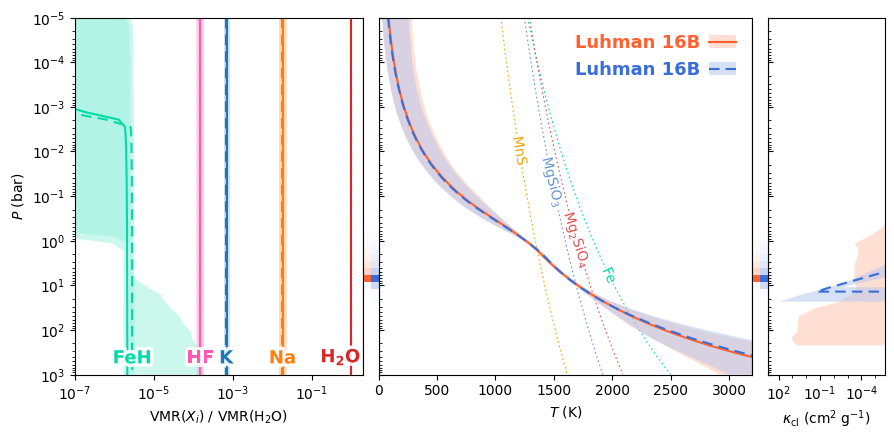

In [7]:
color_species = {'HF':'#FF59B4', 'FeH':'#00DBA8'}

cmap_m_A = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_m_A])
env_colors_m_A = cmap_m_A([0.4,0.6,0.8])
env_colors_m_A[:,3] = 0.5

cmap_m_B = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_m_B])
env_colors_m_B = cmap_m_B([0.4,0.6,0.8])
env_colors_m_B[:,3] = 0.5

median_kwargs_A = {'c':color_m_A, 'lw':1.5}
median_kwargs_B = {'c':color_m_B, 'lw':1.5, 'ls':(0,(5,3))}

fig = plt.figure(figsize=(9,4.3))
gs = fig.add_gridspec(
    nrows=1, ncols=5, hspace=0.0, wspace=0.0, width_ratios=[0.37,0.02,0.48,0.02,0.15], 
)
ax_VMR = fig.add_subplot(gs[0,0])
ax_PT  = fig.add_subplot(gs[0,2])
ax_cl  = fig.add_subplot(gs[0,4])

ax_contr = np.array([fig.add_subplot(gs[0,1]), fig.add_subplot(gs[0,3])])
for ax_i in ax_contr:
    ax_i.imshow(
        contr_A.reshape(-1,1), cmap=cmap_m_A, aspect='auto', interpolation='none', 
        extent=[0,0.5,0,1], transform=ax_i.transAxes, 
    )
    ax_i.imshow(
        contr_B.reshape(-1,1), cmap=cmap_m_B, aspect='auto', interpolation='none', 
        extent=[0.5,1,0,1], transform=ax_i.transAxes, 
    )
    ax_i.spines[['bottom','top']].set_visible(False)
    ax_i.set(yticks=[], xticks=[])

# --- PT -----------------------------------------------
handle_A = utils.plot_envelopes(
    ax_PT, PT_A.pressure, x=PT_A.temperature_envelopes, x_indices=[(0,6)], 
    colors=[env_colors_m_A[0]], median_kwargs=median_kwargs_A, 
    )
handle_B = utils.plot_envelopes(
    ax_PT, PT_B.pressure, x=PT_B.temperature_envelopes, x_indices=[(0,6)], 
    colors=[env_colors_m_B[0]], median_kwargs=median_kwargs_B, 
    )

ax_PT.legend(
    loc='upper right', bbox_to_anchor=(1,1), frameon=False, 
    handles=[handle_A,handle_B], labels=[name_A,name_B], 
    markerfirst=False, handlelength=1.5, handletextpad=0.5, 
    labelcolor='linecolor', prop={'weight':'bold', 'size':13    }, 
)

ann_kwargs = dict(
    text='Fe', y=6, clip_on=True, ha='center', va='center', 
    c=color_species['FeH'], fontsize=10, rotation=-65, #fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=3, foreground='w')],
)
ls = (0,(1.5,2.5)); lw = 0.8
utils.plot_condensation_curve(
    ax_PT, PT_A.pressure, species='Fe', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'], 
    )

ann_kwargs['text'] = r'$\mathrm{Mg_2SiO_4}$'
ann_kwargs['y'] = 1.; ann_kwargs['c'] = '#E75252'; ann_kwargs['rotation'] = -72
utils.plot_condensation_curve(
    ax_PT, PT_A.pressure, species='Mg2SiO4', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'], 
    )

ann_kwargs['text'] = r'$\mathrm{MgSiO_3}$'
ann_kwargs['y'] = 5e-2; ann_kwargs['c'] = '#6796D6'; ann_kwargs['rotation'] = -76
utils.plot_condensation_curve(
    ax_PT, PT_A.pressure, species='MgSiO3', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'], 
    )

ann_kwargs['text'] = r'$\mathrm{MnS}$'
ann_kwargs['y'] = 1e-2; ann_kwargs['c'] = '#F1A208'; ann_kwargs['rotation'] = -80
utils.plot_condensation_curve(
    ax_PT, PT_A.pressure, species='MnS', ann_kwargs=ann_kwargs, lw=lw, ls=ls, c=ann_kwargs['c'], 
    )

ax_PT.tick_params(axis='y', which='both', direction='in')

ax_PT.set(
    yscale='log', ylim=(1e3,1e-5), yticklabels=[], 
    xlim=(0,3200), xlabel=r'$T\ (\mathrm{K})$', xticks=np.arange(0,3500,500), 
    )

# --- Clouds -------------------------------------------
utils.plot_envelopes(
    ax_cl, PT_A.pressure, x=opa_envelope_A1, x_indices=[(0,6)], 
    colors=[env_colors_m_A[0]], #edian_kwargs=median_kwargs_A
    )
utils.plot_envelopes(
    ax_cl, fine_pressure, x=opa_envelope_A1_fine, x_indices=[], 
    colors=[env_colors_m_A[0]], median_kwargs=median_kwargs_A
    )

utils.plot_envelopes(
    ax_cl, PT_B.pressure, x=opa_envelope_B, x_indices=[(0,6)], 
    colors=[env_colors_m_B[0]], #median_kwargs=median_kwargs_B
    )
utils.plot_envelopes(
    ax_cl, fine_pressure, x=opa_envelope_B_fine, x_indices=[], 
    colors=[env_colors_m_B[0]], median_kwargs=median_kwargs_B
    )

ax_cl.tick_params(axis='y', which='both', direction='in')

ax_cl.set(
    yscale='log', ylim=(1e3,1e-5), yticklabels=[], 
    xscale='log', xticks=10.**np.array([2,-1,-4]), xlim=(6e2,2e-6), 
    xlabel=r'$\kappa_\mathrm{cl}\ (\mathrm{cm^2\ g^{-1}})$'
    )
ax_cl.set_xticks([1e1,1e0,1e-2,1e-3,1e-5], labels=[], minor=True)

# --- VMR ----------------------------------------------
color_species = {'HF':'#FF59B4', 'FeH':'#00DBA8', 'H2O':'C3', 'K':'C0', 'Na':'C1'}
pos_x_species = {'HF':0.0, 'FeH':0.0, 'H2O':-0.26, 'K':+0., 'Na':0.0}
for species_i, hill_i in zip(['H2O','HF','FeH','K','Na'], ['H2O1','F1H1','Fe1H1','K','Na']):

    color_i = color_species.get(species_i, 'k')
    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_i])
    env_colors_i = cmap([0.4,0.6,0.8])
    env_colors_i[:,3] = 0.5
    
    median_kwargs_A['c'] = color_i
    median_kwargs_B['c'] = color_i

    utils.plot_envelopes(
        ax_VMR, PT_A.pressure, x=VMR_envelope_A[species_i], x_indices=[(0,6)], 
        colors=[env_colors_i[0]], median_kwargs=median_kwargs_A
        )
    utils.plot_envelopes(
        ax_VMR, PT_B.pressure, x=VMR_envelope_B[species_i], x_indices=[(0,6)], 
        colors=[env_colors_i[0]], median_kwargs=median_kwargs_B
        )
    
    #ax_VMR.plot(FC_VMR[hill_i]/FC_VMR['H2O1'], PT_B.pressure, c=color_i, lw=1, ls=':')
    
    pos_x_i = pos_x_species.get(species_i, -0.2)
    
    ha = 'center'
    if pos_x_i > 0:
        ha = 'left'
    elif pos_x_i < 0:
        ha = 'right'

    pos_x_i += np.log10(VMR_envelope_B[species_i][3].max())
    pos_x_i = 10**pos_x_i

    ha = 'center' if species_i == 'H2O' else ha
    species_i = r'$\mathrm{\bf H_2O}$' if species_i == 'H2O' else species_i

    ax_VMR.annotate(
        species_i, xy=(pos_x_i, 0.02), xycoords=ax_VMR.get_xaxis_transform(), zorder=2, 
        clip_on=True, ha=ha, va='bottom', c=color_i, fontsize=13, fontweight='bold', 
        path_effects=[pe.withStroke(linewidth=5, foreground='w', alpha=0.9)],         
    )
    
ax_VMR.set(
    yscale='log', ylim=(1e3,1e-5), ylabel=r'$P\ (\mathrm{bar})$', 
    xscale='log', xlim=(1e-7,2e0), xlabel=r'VMR($X_i$) / VMR($\mathrm{H_2O}$)'
    )

plt.subplots_adjust(left=0.08, bottom=0.13, top=0.96, right=0.98)
#plt.savefig(f'./plots/J_band_VMR_profiles.pdf')
plt.show()

## Two columns

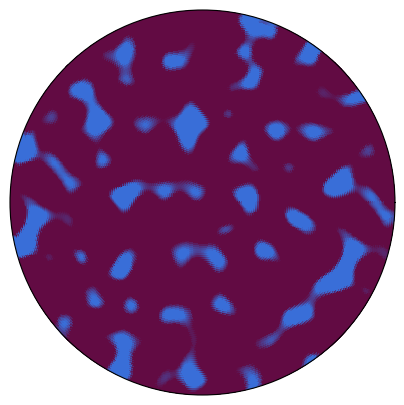

In [229]:
from perlin_noise import PerlinNoise
def make_r_theta_vals():
    
    theta = np.linspace(0, 2*np.pi, 1000)
    r = np.linspace(0, 1, 100)

    tr, rr = np.meshgrid(theta,r)
    
    x = np.cos(tr) * rr
    y = np.sin(tr) * rr

    noise = PerlinNoise(octaves=6, seed=1)
    Z = np.array([
        [noise([x_ij,y_ij]) for x_ij, y_ij in zip(x_i,y_i)]
        for x_i, y_i in zip(x, y)
    ])
    return theta, r, np.array(Z)

theta, r, Z = make_r_theta_vals()
print(Z.min(), Z.max())

fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection':'polar'})
#ax.plot(theta, r)
#ax.pcolormesh(theta, r, Z, edgecolors='face')

cmap = mpl.colors.LinearSegmentedColormap.from_list('', [color_m_A2,color_m_A1])
cmap.set_over(color_m_A1)
cmap.set_under(color_m_A2)

ax.pcolormesh(
    theta, r, Z, edgecolors='face', 
    cmap=cmap, vmin=np.quantile(Z, 0.87-0.1), 
    vmax=np.quantile(Z, 0.87+0.06)
    )
#ax.pcolormesh(theta, r, Z, edgecolors='face', cmap=cmap)
ax.set(xticks=[], yticks=[])
plt.show()

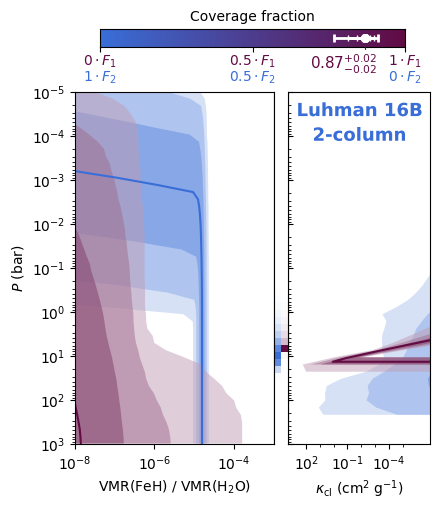

In [15]:
color_m_A1 = color_m_B
#color_m_A1 = 'darkorange'
color_m_A2 = '#620B43'

median_kwargs_A = {'c':color_m_A, 'lw':1.5, 'ls':'-'}
median_kwargs_B = {'c':color_m_B, 'lw':1.5, 'ls':(0,(5,3))}

ylim = (1e3,1e-5)
#ylim = (10**(+2.5),10**(-1.0))

fig = plt.figure(figsize=(4.5,5.0))
gs = fig.add_gridspec(
    nrows=2, ncols=5, hspace=0.24, wspace=0.0, height_ratios=[0.05,0.95], width_ratios=[0.07,0.49,0.04,0.33,0.07]
)
ax_cf = fig.add_subplot(gs[0,1:4])
ax_VMR = fig.add_subplot(gs[1,:2])
ax_cl  = fig.add_subplot(gs[1,-2:])
ax_contr = fig.add_subplot(gs[1,2])

for i, (int_contr_em_i, color_i) in enumerate(zip([int_contr_em_A1,int_contr_em_A2], [color_m_A1,color_m_A2])):

    extent = [0+0.5*i, 0.5+0.5*i, np.log10(PT_B.pressure.max()), np.log10(PT_B.pressure.min())]

    cmap_i = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_i])
    ax_contr.imshow(
        int_contr_em_i.reshape(-1,1), cmap=cmap_i, aspect='auto', 
        interpolation='none', extent=extent
    )
ax_contr.spines[['bottom','top']].set_visible(False)
ax_contr.set(yticks=[], xticks=[], xlim=(0,1), ylim=np.log10(ylim))

ax_cl.annotate(
    name_A, xy=(0.5,0.97), xycoords='axes fraction', 
    ha='center', va='top', c=color_m_A1, fontsize=13, fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )
ax_cl.annotate(
    '2-column', xy=(0.5,0.9), xycoords='axes fraction', 
    ha='center', va='top', c=color_m_A1, fontsize=13, fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )

for VMR_env_i, opa_env_i, opa_env_fine_i, color_i in zip(
        [FeH_envelope_A1,FeH_envelope_A2], 
        [opa_envelope_A1,opa_envelope_A2], 
        [opa_envelope_A1_fine,opa_envelope_A2_fine], 
        [color_m_A1,color_m_A2]
        ):
    
    cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_i])
    env_colors_i = cmap([0.4,0.6,0.8])
    env_colors_i[:,3] = 0.5

    median_kwargs_A['c'] = color_i
    utils.plot_envelopes(
        ax_VMR, y=PT_B.pressure, x=VMR_env_i, #x_indices=[(0,6)], 
        #colors=[env_colors_i[0]], median_kwargs=median_kwargs_A
        colors=[env_colors_i[0],env_colors_i[1],env_colors_i[2]], median_kwargs=median_kwargs_A
        )

    #'''
    utils.plot_envelopes(
        ax_cl, PT_B.pressure, x=opa_env_i, #x_indices=[(0,6)], 
        #colors=[env_colors_i[0]], #median_kwargs=median_kwargs_A
        colors=[env_colors_i[0],env_colors_i[1],env_colors_i[2]], #median_kwargs=median_kwargs_A
        )
    utils.plot_envelopes(
        ax_cl, fine_pressure, x=opa_env_fine_i, x_indices=[], 
        colors=[], median_kwargs=median_kwargs_A
        )
    #'''
    
    '''
    utils.plot_envelopes(
        ax_cl, fine_pressure, x=opa_env_fine_i, 
        colors=env_colors_i, median_kwargs=median_kwargs_A
        )
    '''

'''
#color_i = color_m_B
color_i = 'k'
cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_i])
env_colors_i = cmap([0.4,0.6,0.8])
env_colors_i[:,3] = 0.5
median_kwargs_A['c'] = color_i
median_kwargs_A['lw'] = 2
median_kwargs_A['ls'] = (0,(5,3))
#median_kwargs_A['alpha'] = 0.7
#median_kwargs_A['zorder'] = -1

utils.plot_envelopes(
    ax_VMR, y=PT_B.pressure, x=FeH_envelope_B, x_indices=[], median_kwargs=median_kwargs_A, zorder=-1, 
    )
utils.plot_envelopes(
    ax_cl, PT_B.pressure, x=opa_envelope_B, x_indices=[], median_kwargs=median_kwargs_A, zorder=-1, 
    )
'''


ax_VMR.set(
    xlabel=r'VMR(FeH) / VMR($\mathrm{H_2O}$)', 
    ylabel=r'$P\ (\mathrm{bar})$', xscale='log', yscale='log', 
    #xlim=(10**(-6.1),10**(-3.9)), ylim=(1e3,1e-5)
    #xlim=(10**(-6.2),10**(-3.9)), ylim=(1e3,1e-5)
    xlim=(1e-8,1e-3), ylim=ylim
    )
#ax_VMR.set_xticks([1e-6,1e-4], labels=[], minor=True)
#ax_VMR.set_xticks([1e-7,1e-5,1e-3], labels=[], minor=True)

ax_cl.set(
    xscale='log', yscale='log', ylim=ylim, yticklabels=[], 
    xticks=10.**np.array([2,-1,-4]), xlim=(6e2,2e-6), 
    xlabel=r'$\kappa_\mathrm{cl}\ (\mathrm{cm^2\ g^{-1}})$'
    )
ax_cl.set_xticks([1e1,1e0,1e-2,1e-3,1e-5], labels=[], minor=True)
ax_cl.set(xlim=(2e3,1e-7))


ax_cl.tick_params(axis='y', which='both', direction='in')

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
cmap = mpl.colors.LinearSegmentedColormap.from_list('', [color_m_A1,color_m_A2])
ax_cf.imshow(gradient, aspect='auto', cmap=cmap, extent=[1,0,0,1])

err = np.quantile(cf_posterior_A, q=q)
#for err_idx, capthick, capsize in zip([[0,6],[2,4]], [2,1], [3.2,2.5]):
#for err_idx, capthick, capsize in zip([[0,6],[1,5],[2,4]], [2,1,1], [3.2,2.5,2.5]):
for err_idx, capthick, capsize in zip([[0,6],[1,5],[2,4]], [2,1,1], [3.2,2.5,2.5]):
    xerr = np.abs(err[err_idx] - err[3])[:,None]
    ax_cf.errorbar(
        np.median(cf_posterior_A), 0.5, xerr=xerr, c='w', fmt='.', 
        markersize=11, lw=2, capthick=capthick, capsize=capsize, 
        )
    
ax_cf.set(
    xlim=(1,0), ylim=(0,1), yticks=[], xticks=[0,0.5,1], xticklabels=[], 
    )

iterables = zip(
    [0,0.5,1],
    [r'$1\cdot F_2$', r'$0.5\cdot F_2$', r'$0\cdot F_2$'],
    [r'$0\cdot F_1$',r'$0.5\cdot F_1$', r'$1\cdot F_1$'],
)
for x_i, label_A1, label_A2 in iterables:
    ax_cf.annotate(label_A2, xy=(x_i,-1.2), xycoords=ax_cf.transAxes, ha='center', va='bottom', color=color_m_A2)
    ax_cf.annotate(label_A1, xy=(x_i,-1.2), xycoords=ax_cf.transAxes, ha='center', va='top', color=color_m_A1)

ax_cf.xaxis.set_label_position('top') 
ax_cf.set_xlabel('Coverage fraction', labelpad=6.0)

f1 = '{:.2f}'.format(np.median(1-cf_posterior_A))
f2 = '{:.2f}'.format(np.quantile(1-cf_posterior_A, q=q)[2]-np.median(1-cf_posterior_A))
f3 = '{:.2f}'.format(np.quantile(1-cf_posterior_A, q=q)[4]-np.median(1-cf_posterior_A))
ax_cf.annotate(
    r'$'+f1 + '_{'+f2+'}' + '^{+'+f3+'}$', xy=(np.median(1-cf_posterior_A),0.), 
    xytext=(np.median(1-cf_posterior_A)-0.07,-1.5), ha='center', va='bottom', 
    xycoords=ax_cf.transAxes, color=color_m_A2, fontsize=11, 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle,angleA=0,angleB=90', 
        'shrinkA':0, 'shrinkB':0, 'lw':0.8, 'color':color_m_A2, 
        }, 
    )

plt.subplots_adjust(left=0.17, bottom=0.11, top=0.94, right=0.96)

plt.savefig('./plots/J_band_2columns.pdf')
plt.show()

array([-5.56659558, -5.53118456])

In [11]:
np.log10(VMR_envelope_A['FeH'][3,35]), (np.log10(VMR_envelope_A['FeH'][2])-np.log10(VMR_envelope_A['FeH'][3]))[35], (np.log10(VMR_envelope_A['FeH'][4])-np.log10(VMR_envelope_A['FeH'][3]))[35]

(-5.673170509495021, -0.03275793498053492, 0.034545827000275864)

In [12]:
np.log10(VMR_envelope_B['FeH'][3,35]), (np.log10(VMR_envelope_B['FeH'][2])-np.log10(VMR_envelope_B['FeH'][3]))[35], (np.log10(VMR_envelope_B['FeH'][4])-np.log10(VMR_envelope_B['FeH'][3]))[35]

(-5.548496188242888, -0.018099388845677744, 0.01731163150922299)

## Variability

In [ ]:
Res = utils.RetrievalResults(
    prefix='../retrieval_outputs/fiducial_J_B_ret_53_2columns_n1000/test_', 
    m_set='J1226_A', w_set='J1226', load_posterior=True
    )

bestfit_params = Res.bestfit_params

pRT_atm_c1 = Res._load_object('pRT_atm', bestfit_prefix=False, m_set='J1226_A')
pRT_atm_c2 = Res._load_object('pRT_atm', bestfit_prefix=False, m_set='J1226_B')

Chem_c1 = Res._load_object('Chem', m_set='J1226_A')
Chem_c2 = Res._load_object('Chem', m_set='J1226_B')

PT_c1 = Res._load_object('PT', m_set='J1226_A')
PT_c2 = Res._load_object('PT', m_set='J1226_B')

del Res

pRT_atm_c1.sum_m_spec = True
pRT_atm_c2.sum_m_spec = True

m_spec_c1 = pRT_atm_c1(
    Chem_c1.mass_fractions, 
    PT_c1.temperature, 
    bestfit_params['J1226_A'], 
)
m_spec_c2 = pRT_atm_c2(
    Chem_c2.mass_fractions, 
    PT_c2.temperature, 
    bestfit_params['J1226_B'], 
)

current_pRT_flux = pRT_atm_c1.pRT_flux.copy()
other_pRT_flux   = pRT_atm_c2.pRT_flux.copy()
import copy
cf = copy.copy(bestfit_params['J1226_A']['cloud_fraction'])

  analysing data from ../retrieval_outputs/fiducial_J_B_ret_53_2columns_n1000/test_.txt
['modes', 'nested sampling global log-evidence', 'nested sampling global log-evidence error', 'global evidence', 'global evidence error', 'nested importance sampling global log-evidence', 'nested importance sampling global log-evidence error', 'marginals']
1395575.5298175712
1395560.6774313925
1395560.6774313925


In [ ]:
pRT_atm_c1.params['cloud_fraction'] = 1.0
pRT_atm_c1.pRT_flux = current_pRT_flux.copy()
m_spec_combined = pRT_atm_c1.combine_models(
    other_pRT_wave=[pRT_atm_c2.pRT_wave], other_pRT_flux=[other_pRT_flux.copy()], 
    get_contr=False, get_full_spectrum=False, 
)
m_flux_c1 = m_spec_combined.flux.copy()

pRT_atm_c1.params['cloud_fraction'] = 0.0
pRT_atm_c1.pRT_flux = current_pRT_flux.copy()
m_spec_combined = pRT_atm_c1.combine_models(
    other_pRT_wave=[pRT_atm_c2.pRT_wave], other_pRT_flux=[other_pRT_flux.copy()], 
    get_contr=False, get_full_spectrum=False, 
)
m_flux_c2 = m_spec_combined.flux.copy()

base_flux = m_flux_c1*cf + m_flux_c2*(1-cf)

0.8702588090651062


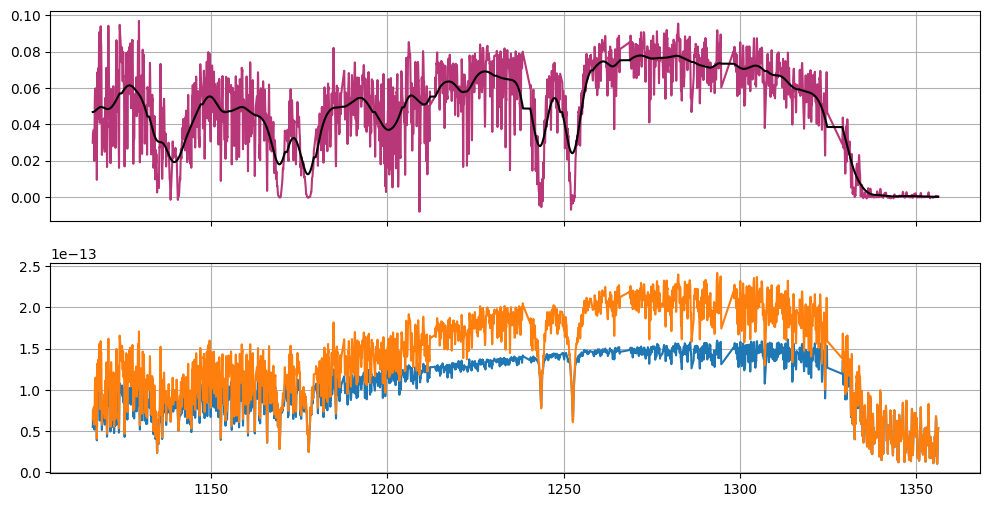

In [ ]:
print(cf)
cf_delta = 0.19
flux_i = m_flux_c1*(cf-cf_delta) + m_flux_c2*(1-(cf-cf_delta))

from scipy.ndimage import gaussian_filter

fig, ax = plt.subplots(figsize=(12,6), nrows=2, sharex=True)
ax[0].plot(
    pRT_atm_c1.d_wave.flatten(), (flux_i/base_flux-1).flatten(), 
    c=plt.get_cmap('magma')(0.5)
    )
ax[0].plot(
    pRT_atm_c1.d_wave.flatten(), 
    gaussian_filter((flux_i/base_flux-1).flatten(), sigma=400), 
    c='k'
    )

ax[1].plot(
    pRT_atm_c1.d_wave.flatten(), m_flux_c1.flatten()
)
ax[1].plot(
    pRT_atm_c1.d_wave.flatten(), m_flux_c2.flatten()
)

for ax_i in ax:
    ax_i.grid(True)

plt.show()